/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 28s 38ms/step - accuracy: 0.3804 - loss: 2.0751 - val_accuracy: 0.9290 - val_loss: 0.2573
Epoch 2/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 24s 35ms/step - accuracy: 0.8928 - loss: 0.3307 - val_accuracy: 0.9964 - val_loss: 0.0418
Epoch 3/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 42s 36ms/step - accuracy: 0.9638 - loss: 0.1195 - val_accuracy: 0.9989 - val_loss: 0.0165
Epoch 4/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.9794 - loss: 0.0720 - val_accuracy: 1.0000 - val_loss: 0.0042
Epoch 5/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 40s 35ms/step - accuracy: 0.9831 - loss: 0.0550 - val_accuracy: 1.0000 - val_loss: 0.0021
Epoch 6/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 41s 36ms/step - accuracy: 0.9873 - loss: 0.0399 - val_accuracy: 0.9996 - val_loss: 0.0038
Epoch 7/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 42s 37ms/step - accuracy: 0.9882 - loss: 0.0350 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 8/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 23s 34ms/step - accuracy: 0.9922 - loss: 0.0266 - 

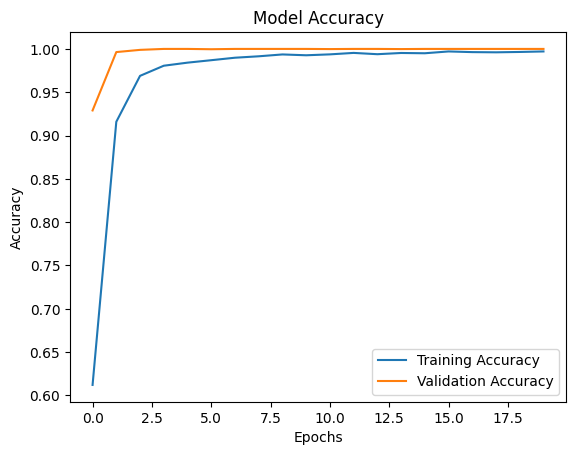

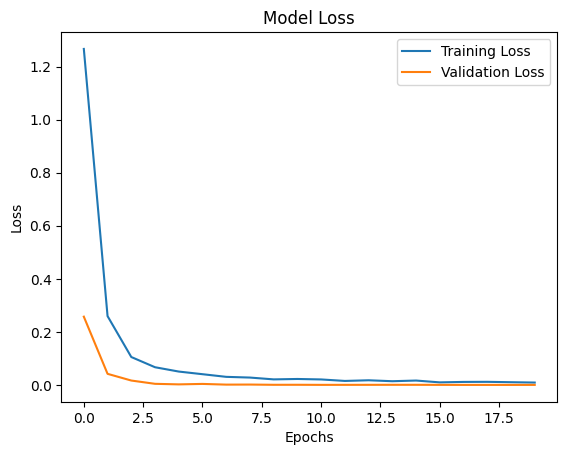

In [3]:
import pandas as pd
import numpy as np
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical, plot_model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

data_path = r"sign_mnist_train.csv"
data = pd.read_csv(data_path)

labels = data['label'].values  
images = data.iloc[:, 1:].values  

images = images.reshape(-1, 28, 28, 1).astype('float32') / 255.0
labels = to_categorical(labels, 26) 

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.28),  

    layers.Dense(26, activation='softmax')
])

plot_model(model, to_file='cnn_model_architecture.png', show_shapes=True, show_layer_names=True)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.savefig("accuracy_plot.png")  
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.savefig("loss_plot.png") 
plt.show()

observations = f"""
CNN Model Observations:
------------------------
1. Test Accuracy: {test_acc:.4f}
2. Overfitting Analysis:
   - Training Accuracy increased steadily.
   - Validation Accuracy remained close to training accuracy, indicating minimal overfitting.
3. Handling Overfitting:
   - Dropout layer (rate 0.28) helped in reducing overfitting.
   - Adding an additional dropout layer with rate 0.4 after the convolutional layers could further reduce overfitting.
4. Share Structure and Invariance Property:
   - The convolutional layers leverage shared structure to detect patterns irrespective of their position.
   - MaxPooling layers provide spatial invariance by reducing feature dimensions and emphasizing dominant patterns.

Model handled these properties well for the task of sign language letter classification.
"""

with open("observations.txt", "w") as f:
    f.write(observations)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0437 - val_loss: 0.0085
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0095 - val_loss: 0.0084
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0115 - val_loss: 0.0077
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0119 - val_loss: 0.0075
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0100 - val_loss: 0.0075
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0103 - val_loss: 0.0082
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0091 - val_loss: 0.0074
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0101 - val_loss: 0.0074
Epoch 9/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0094 - val_loss: 0.0073
Epoch 10/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0096 - val_loss: 0.0072
Epoch 11/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0090 - val_loss: 0.0073
Epoch 12/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0096 - val_l

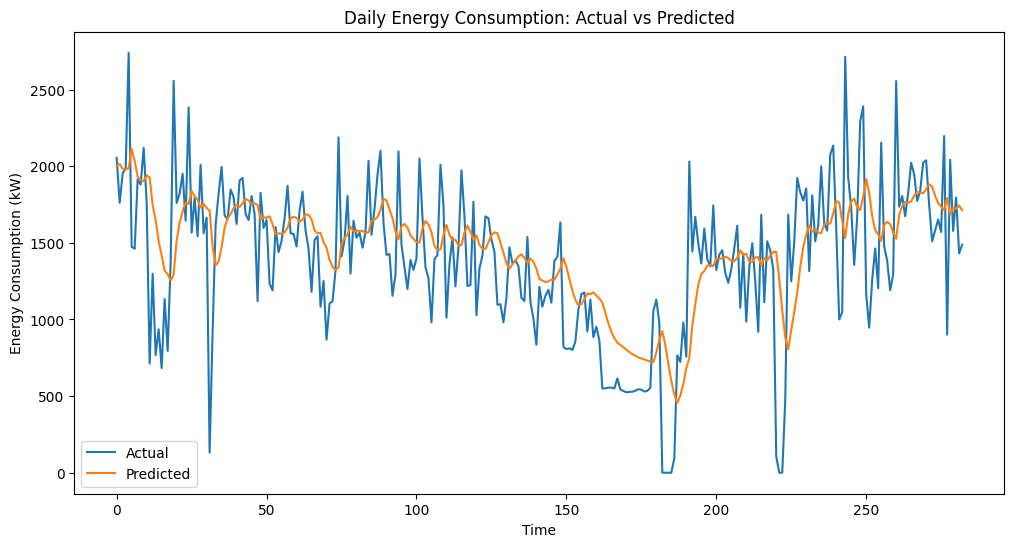

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

file_path = 'household_power_consumption.txt'
data = pd.read_csv(
    file_path,
    delimiter=';',
    na_values=['nan', '?']
)

data['datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], format='%d/%m/%Y %H:%M:%S', errors='coerce')

data = data.dropna(subset=['datetime'])

data.set_index('datetime', inplace=True)

data['Global_active_power'] = pd.to_numeric(data['Global_active_power'], errors='coerce')
data = data.dropna(subset=['Global_active_power'])

daily_data = data['Global_active_power'].resample('D').sum().dropna()

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(daily_data.values.reshape(-1, 1))

def create_sequences(data, step=30):
    X, y = [], []
    for i in range(len(data) - step):
        X.append(data[i:i + step])
        y.append(data[i + step])
    return np.array(X), np.array(y)

step = 30
X, y = create_sequences(scaled_data, step)
X = X.reshape((X.shape[0], X.shape[1], 1))

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(step, 1)),
    LSTM(50),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
actual = scaler.inverse_transform(y_test)

plt.figure(figsize=(12, 6))
plt.plot(actual, label='Actual')
plt.plot(predictions, label='Predicted')
plt.title('Daily Energy Consumption: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Energy Consumption (kW)')
plt.legend()
plt.show()
